![LOGO_PUJ.png](https://epilab.co/wp-content/uploads/2019/02/Epigenetica-Y-Cancer-Javeriana-2.png)
----------------------------------------------------------------

**Fechas**: 03/02/2025, 10/02/2025, 17/02/2025, 19/05/2025

**Autor**: Paula Andrea Velasquez Romero

**Materia:** Procesamiento de datos a gran escala

**Tópico:** Introducción a Pyspark en el Ambiente Databricks, y continuación con preparación, entrenamiento y evaluacíon con métricas de un  modelo de predección.

----------------------------------------------------------------

In [1]:
import numpy as up
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import mean , col, split, count , when , lit , isnan, col, lit, when

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MySparkApp").getOrCreate()

In [2]:
#Descripción del entorno
spark

In [4]:
#Cargar los Datos
df00 = spark.read.csv("/content/stroke_pyspark.csv", header=True, inferSchema=True)
df00.columns

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

#####1. Se cambian los nombres de las columnas


In [5]:
# Lista que contiene los nuevos nombres para las columnas del DataFrame
nuevosNombres = ['id',
 'genero',
 'edad',
 'hipertension',
 'enfCardiaca',
 'EdoCivil',
 'trabajo',
 'Residencia',
 'Niveldeglucosaprom',
 'IMC',
 'Fumador',
 'ACV']

df01 = df00
# Bucle para renombrar cada columnas
for antes, nuevo in zip(df00.columns, nuevosNombres):
    df01 = df01.withColumnRenamed(antes, nuevo)


#####2. Verifirificar el esquema del DataFrame

In [6]:
#Mostrar la estructura de Dataframe
df01.printSchema()

root
 |-- id: integer (nullable = true)
 |-- genero: string (nullable = true)
 |-- edad: double (nullable = true)
 |-- hipertension: integer (nullable = true)
 |-- enfCardiaca: integer (nullable = true)
 |-- EdoCivil: string (nullable = true)
 |-- trabajo: string (nullable = true)
 |-- Residencia: string (nullable = true)
 |-- Niveldeglucosaprom: double (nullable = true)
 |-- IMC: string (nullable = true)
 |-- Fumador: string (nullable = true)
 |-- ACV: integer (nullable = true)



#####3. En relación a la coherencia de los datos , se procede a :

   - El tipo de datos "IMC" , se pasa a tipo de dato "DOUBLE"

   - El tipo de dato " edad", se pasa a tipo de dato " INTERGER"

In [7]:
# Convierte la columna 'edad' a tipo entero (int)
df01 = df01.withColumn("edad", df01.edad.cast("int"))
# Convierte la columna 'IMC' a tipo double (float)
df01 = df01.withColumn("IMC", df01.IMC.cast("double"))

df01.printSchema()

root
 |-- id: integer (nullable = true)
 |-- genero: string (nullable = true)
 |-- edad: integer (nullable = true)
 |-- hipertension: integer (nullable = true)
 |-- enfCardiaca: integer (nullable = true)
 |-- EdoCivil: string (nullable = true)
 |-- trabajo: string (nullable = true)
 |-- Residencia: string (nullable = true)
 |-- Niveldeglucosaprom: double (nullable = true)
 |-- IMC: double (nullable = true)
 |-- Fumador: string (nullable = true)
 |-- ACV: integer (nullable = true)



In [8]:
#MostrarDatos
df01.show(10)

+-----+------+----+------------+-----------+--------+-------------+----------+------------------+----+---------------+---+
|   id|genero|edad|hipertension|enfCardiaca|EdoCivil|      trabajo|Residencia|Niveldeglucosaprom| IMC|        Fumador|ACV|
+-----+------+----+------------+-----------+--------+-------------+----------+------------------+----+---------------+---+
| 9046|  Male|  67|           0|          1|     Yes|      Private|     Urban|            228.69|36.6|formerly smoked|  1|
|51676|Female|  61|           0|          0|     Yes|Self-employed|     Rural|            202.21|NULL|   never smoked|  1|
|31112|  Male|  80|           0|          1|     Yes|      Private|     Rural|            105.92|32.5|   never smoked|  1|
|60182|Female|  49|           0|          0|     Yes|      Private|     Urban|            171.23|34.4|         smokes|  1|
| 1665|Female|  79|           1|          0|     Yes|Self-employed|     Rural|            174.12|24.0|   never smoked|  1|
|56669|  Male|  

#####4. Exploración de categorias

In [9]:
#Obtener cantidad total de registros
df01.groupby(['genero']).count().show()

+------+-----+
|genero|count|
+------+-----+
|Female| 2994|
| Other|    1|
|  Male| 2115|
+------+-----+



In [10]:
#Cantidad de registros en cada valor posible para hipertension
df01.groupby(['hipertension']).count().show()

+------------+-----+
|hipertension|count|
+------------+-----+
|           1|  498|
|           0| 4612|
+------------+-----+



In [13]:
#Cantidad de registros en cada valor posible para enfCardiaca
df01.groupby(['enfCardiaca']).count().show()

+-----------+-----+
|enfCardiaca|count|
+-----------+-----+
|          1|  276|
|          0| 4834|
+-----------+-----+



In [12]:
#Cantidad de registros en cada valor posible para EdoCivil
df01.groupby(['EdoCivil']).count().show()

+--------+-----+
|EdoCivil|count|
+--------+-----+
|      No| 1757|
|     Yes| 3353|
+--------+-----+



In [14]:
#Cantidad de registros en cada valor posible para trabajo
df01.groupby(['trabajo']).count().show()

+-------------+-----+
|      trabajo|count|
+-------------+-----+
| Never_worked|   22|
|Self-employed|  819|
|      Private| 2925|
|     children|  687|
|     Govt_job|  657|
+-------------+-----+



In [ ]:
#Cantidad de registros en cada valor posible para Residencia
df01.groupby(['Residencia']).count().show()

+----------+-----+
|Residencia|count|
+----------+-----+
|     Urban| 2596|
|     Rural| 2514|
+----------+-----+



In [ ]:
#Cantidad de registros en cada valor posible para Fumador
df01.groupby(['Fumador']).count().show()

+---------------+-----+
|        Fumador|count|
+---------------+-----+
|         smokes|  789|
|        Unknown| 1544|
|   never smoked| 1892|
|formerly smoked|  885|
+---------------+-----+



In [ ]:
#Cantidad de registros en cada valor posible para ACV
df01.groupby(['ACV']).count().show()

+---+-----+
|ACV|count|
+---+-----+
|  1|  249|
|  0| 4861|
+---+-----+



In [15]:
#Se descarta el registro cuyo valor en género es "Other"
df02 = df01.where("genero <> 'Other'")

#Se verifica que ya no esta "Other"
df02.groupby(['genero']).count().show()

+------+-----+
|genero|count|
+------+-----+
|Female| 2994|
|  Male| 2115|
+------+-----+



#####5. Identificar Nulos

In [16]:
#Tabla de nulos o imposibles
df01.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df01.columns]).show()

+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+---+
| id|genero|edad|hipertension|enfCardiaca|EdoCivil|trabajo|Residencia|Niveldeglucosaprom|IMC|Fumador|ACV|
+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+---+
|  0|     0|   0|           0|          0|       0|      0|         0|                 0|201|      0|  0|
+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+---+



Se puede observar que la columna IMC presenta datos Nulos o Imposibles. A pesar que el porcentaje de datos nulos es muy bajo, se requiere crear una estrategia para mutar o cambiar los datos, sin que sean eliminados.
- Se requiere hacer estaratos de promedios cada 10 años
- Los promedios por estratos se catalogan por género
- Se sustituye por el promedio de los nulos según género/estrato_edad

In [21]:
# Se extrae promedio IMC por Estrato y Female
avg10F = df02.where((col('genero')== lit('Female')) & (col('edad')<10)).select(mean(col('IMC'))).collect()
avg20F = df02.where((col('genero')== lit('Female')) & (col('edad')>10) & (col('edad')<20)).select(mean(col('edad'))).collect()
avg30F = df02.where((col('genero')== lit('Female')) & (col('edad')>20) & (col('edad')<30)).select(mean(col('edad'))).collect()
avg40F = df02.where((col('genero')== lit('Female')) & (col('edad')>30) & (col('edad')<40)).select(mean(col('edad'))).collect()
avg50F = df02.where((col('genero')== lit('Female')) & (col('edad')>40) & (col('edad')<50)).select(mean(col('edad'))).collect()
avg60F = df02.where((col('genero')== lit('Female')) & (col('edad')>50) & (col('edad')<60)).select(mean(col('edad'))).collect()
avg70F = df02.where((col('genero')== lit('Female')) & (col('edad')>60) & (col('edad')<70)).select(mean(col('edad'))).collect()
avg80F = df02.where((col('genero')== lit('Female')) & (col('edad')>70) & (col('edad')<80)).select(mean(col('edad'))).collect()
avg90F = df02.where((col('genero')== lit('Female')) & (col('edad')>80) & (col('edad')<90)).select(mean(col('edad'))).collect()

print(avg10F)

[Row(avg(IMC)=18.687962962962963)]


In [22]:
#Imputan valores faltantes en la columna IMC
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 10), avg10F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 20), avg20F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 30), avg30F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 40), avg40F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 50), avg50F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 60), avg60F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 70), avg70F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 80), avg80F[0][0]).otherwise(df02['IMC']))
df03 = df02.withColumn("IMC", when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 90), avg90F[0][0]).otherwise(df02['IMC']))

In [23]:
df03.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df03.columns]).show()

+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+---+
| id|genero|edad|hipertension|enfCardiaca|EdoCivil|trabajo|Residencia|Niveldeglucosaprom|IMC|Fumador|ACV|
+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+---+
|  0|     0|   0|           0|          0|       0|      0|         0|                 0|104|      0|  0|
+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+---+



In [24]:
#Se extrae promedio IMC por Estrato y Male
avg10M = df02.where((col('genero')== lit('Male')) & (col('edad')<10)).select(mean(col('IMC'))).collect()
avg20M = df02.where((col('genero')== lit('Male')) & (col('edad')>10) & (col('edad')<20)).select(mean(col('edad'))).collect()
avg30M = df02.where((col('genero')== lit('Male')) & (col('edad')>20) & (col('edad')<30)).select(mean(col('edad'))).collect()
avg40M = df02.where((col('genero')== lit('Male')) & (col('edad')>30) & (col('edad')<40)).select(mean(col('edad'))).collect()
avg50M = df02.where((col('genero')== lit('Male')) & (col('edad')>40) & (col('edad')<50)).select(mean(col('edad'))).collect()
avg60M = df02.where((col('genero')== lit('Male')) & (col('edad')>50) & (col('edad')<60)).select(mean(col('edad'))).collect()
avg70M = df02.where((col('genero')== lit('Male')) & (col('edad')>60) & (col('edad')<70)).select(mean(col('edad'))).collect()
avg80M = df02.where((col('genero')== lit('Male')) & (col('edad')>70) & (col('edad')<80)).select(mean(col('edad'))).collect()
avg90M = df02.where((col('genero')== lit('Male')) & (col('edad')>80) & (col('edad')<90)).select(mean(col('edad'))).collect()

print(avg10M)

[Row(avg(IMC)=19.03168724279836)]


In [25]:
#Imputar valores faltantes en la columna IMC
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 10), avg10M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 20), avg20M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 30), avg30M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 40), avg40M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 50), avg50M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 60), avg60M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 70), avg70M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 80), avg80M[0][0]).otherwise(df02['IMC']))
df04 = df02.withColumn("IMC", when((df02['genero'] == 'Male') & (df02['IMC'].isNull()) & (df02['edad'] < 90), avg90M[0][0]).otherwise(df02['IMC']))

In [26]:
df04.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df04.columns]).show()

+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+---+
| id|genero|edad|hipertension|enfCardiaca|EdoCivil|trabajo|Residencia|Niveldeglucosaprom|IMC|Fumador|ACV|
+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+---+
|  0|     0|   0|           0|          0|       0|      0|         0|                 0| 97|      0|  0|
+---+------+----+------------+-----------+--------+-------+----------+------------------+---+-------+---+



#####6. Función Para calcular promedio de IMC

In [27]:
#Calcular promedio de IMC a partir de las edades y el género
def avg_imc_by_gender_and_age_range(df, gender, age_ranges):
    results = []

    for lower, upper in age_ranges:
        avg_imc = df.where(
            (df["genero"] == lit(gender)) &
            (df["edad"] > lower) &
            (df["edad"] <= upper)
        ).select(mean("IMC")).collect()

        results.append({
            "age_range": f"{lower}-{upper}",
            "avg_imc": avg_imc[0][0] if avg_imc else None
        })

    return results

age_ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90)]
gender = "Female"

# Llamada a la función
avg_imc_results = avg_imc_by_gender_and_age_range(df02, gender, age_ranges)

# Mostrar resultados
for result in avg_imc_results:
    print(f"Para el genero {gender} en el Rango de Edad {result['age_range']}: Promedio IMC = {result['avg_imc']}")

Para el genero Female en el Rango de Edad 0-10: Promedio IMC = 18.784186046511625
Para el genero Female en el Rango de Edad 10-20: Promedio IMC = 25.516000000000012
Para el genero Female en el Rango de Edad 20-30: Promedio IMC = 28.640163934426226
Para el genero Female en el Rango de Edad 30-40: Promedio IMC = 31.16508313539193
Para el genero Female en el Rango de Edad 40-50: Promedio IMC = 30.94269662921346
Para el genero Female en el Rango de Edad 50-60: Promedio IMC = 31.923094170403576
Para el genero Female en el Rango de Edad 60-70: Promedio IMC = 30.717080745341597
Para el genero Female en el Rango de Edad 70-80: Promedio IMC = 29.233229813664597
Para el genero Female en el Rango de Edad 80-90: Promedio IMC = 28.101428571428578


#####7. Gráfica

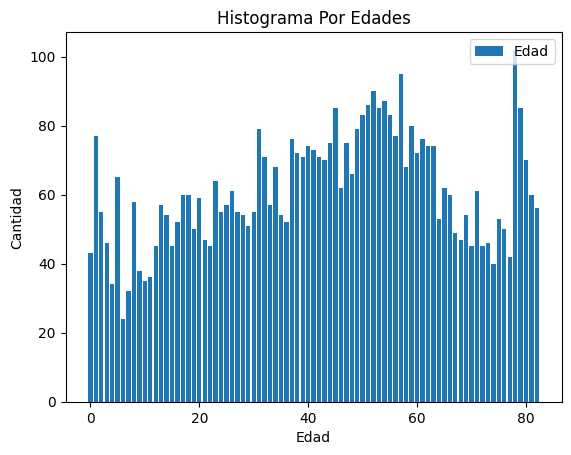

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession


try:
    df04
except NameError:
    # Bloque ejecutado si df04 no existe (NameError)
    data = {"edad": [25, 30, 35, 25, 40, 30, 30, 25, 35, 40, 40, 25]}
    df04 = pd.DataFrame(data)


# Verificación del tipo de DataFrame y procesamiento adecuado
if isinstance(df04, pd.DataFrame):
    df_grouped = df04.groupby("edad").size().reset_index(name="cantidad")
    edades = df_grouped["edad"]
    cantidades = df_grouped["cantidad"]

# Procesamiento para DataFrames de PySpark
elif "pyspark.sql.dataframe.DataFrame" in str(type(df04)):
    df_grouped = df04.groupBy("edad").count().orderBy("edad")
    df_pandas = df_grouped.toPandas()  # Convertir a Pandas
    edades = df_pandas["edad"]
    cantidades = df_pandas["count"]

else:
  # Manejo de error para tipos no soportados
    raise TypeError("df04 no es un DataFrame válido de Pandas o PySpark")

# Configuración y visualización del gráfico
plt.bar(edades, cantidades)
plt.ylabel("Cantidad")
plt.xlabel("Edad")
plt.title("Histograma Por Edades")
plt.legend(["Edad"], loc="upper right")

plt.show()

- Se observa una participación relativamente uniforme entre los diferentes grupos etarios, aunque se destacan ciertos picos en las edades cercanas a los 0, 40, 55 y 80 años, lo cual indica una mayor concentración de individuos en esos rangos. La mayoría de los datos se agrupan entre los 20 y 80 años, con una ligera mayor densidad en los grupos de edad media (40-60 años), que suelen estar más asociados a factores de riesgo de enfermedades como el derrame cerebral.

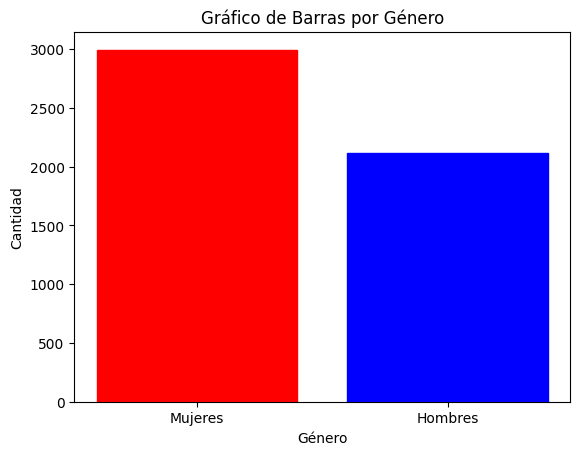

In [29]:
#Gráfica de género

# Filtrar los datos para eliminar el valor 'gender' y mantener solo 'Female' y 'Male'
df_filtered = df04.filter((col('genero') == 'Female') | (col('genero') == 'Male'))

# Obtener el conteo por grupo en la columna 'genero'
genero_count = df_filtered.groupby('genero').count().select('genero', 'count')

# Convertir a RDD y luego a lista para trabajar con ella
genero_count_list = genero_count.rdd.map(lambda x: (x[0], x[1])).collect()

# Separa las categorías y los conteos
categorias = ['Mujeres', 'Hombres']
cantidad = [x[1] for x in genero_count_list]
# Crear la gráfica de barras
grafica = plt.bar(categorias, cantidad)

grafica[0].set_color('r')
grafica[1].set_color('b')
plt.ylabel('Cantidad')
plt.xlabel('Género')
plt.title('Gráfico de Barras por Género')
plt.show()


- Se observa que hay una mayor cantidad de mujeres (representadas en color rojo) en comparación con los hombres (representados en azul), con aproximadamente 3000 mujeres frente a unos 2100 hombres. Esta diferencia indica que la muestra está compuesta en mayor proporción por mujeres.

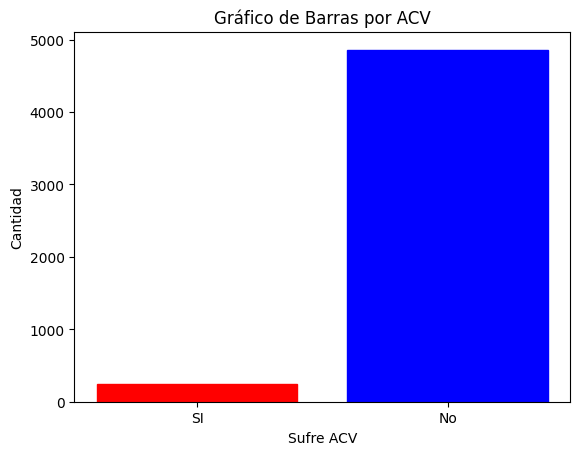

In [70]:
#Gráficas de enfermedades cardiacas

enfCardiaca = df04.groupBy('ACV').count().select('ACV', 'count')
# Filtrar los datos para eliminar el valor 'Stroke' y mantener solo '0' y '1'
enfCardiaca_filtered = enfCardiaca.filter((col('ACV') == 0) | (col('ACV') == 1))
# Convertir a RDD y luego a una lista
enfCardiaca_filtered = enfCardiaca_filtered.rdd.map(lambda x: (x[0], x[1])).collect()
# Separa los valores de las categorías y los conteos
categorias = ['SI', 'No']
cantidad = [x[1] for x in enfCardiaca_filtered]
grafica = plt.bar(categorias, cantidad)
grafica[0].set_color('r')
grafica[1].set_color('b')
# Etiquetas y formato
plt.ylabel('Cantidad')
plt.xlabel('Sufre ACV')
plt.title('Gráfico de Barras por ACV')
plt.show()

- Se observa que la gran mayoría de los pacientes, representados con la barra azul bajo la categoría "No", no han sufrido un ACV, con una cantidad cercana a 4900 casos. En contraste, un número significativamente menor de pacientes, representado con la barra roja en la categoría "Sí", ha sufrido un ACV, con aproximadamente 250 casos. Esta marcada diferencia indica un fuerte desbalance en los datos, lo cual es un aspecto crucial a tener en cuenta en el análisis y desarrollo de modelos predictivos.

# Modelado

In [49]:
# Se importan las librerias para idexar, ensamblaje, Pipeline, modelo de clasificación y Métrias
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

## Indexación y Pipeline

In [50]:
# Se indexan las variables categoricas
categorical_cols = ["genero", "EdoCivil", "trabajo", "Residencia", "Fumador"]
indexers = [StringIndexer(inputCol=col, outputCol=col+"_idx") for col in categorical_cols]

# Se crea el pipeline
pipeline = Pipeline(stages=indexers)
df04_indexed = pipeline.fit(df04).transform(df04)

# Se indexan las variables númericas + categoricas
feature_cols = ["edad", "hipertension", "enfCardiaca", "Niveldeglucosaprom", "IMC"] + [col+"_idx" for col in categorical_cols]

# Se ensablan las variables omitiendo nulls
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features", handleInvalid='skip')
df04_final = assembler.transform(df04_indexed)

## Modelo Modelo de clasificación (Árbol de Decisión)

In [51]:
# Separar datos de entrenamiento y prueba
train, test = df04_final.randomSplit([0.8, 0.2], seed=13)

# Modelo de clasificación (Árbol de Decisión)
DTC = DecisionTreeClassifier(featuresCol="features", labelCol="ACV")
modelo = DTC.fit(train)

#Realizar predicciones
predictions = modelo.transform(test)
predictions.select("ACV", "prediction", "probability").show(10)

+---+----------+--------------------+
|ACV|prediction|         probability|
+---+----------+--------------------+
|  0|       0.0|[0.95679567956795...|
|  0|       0.0|[0.99797468354430...|
|  0|       0.0|[0.95679567956795...|
|  0|       0.0|[0.87081339712918...|
|  0|       0.0|[0.95679567956795...|
|  0|       0.0|[0.95679567956795...|
|  0|       0.0|[0.95679567956795...|
|  0|       0.0|[0.99797468354430...|
|  0|       0.0|[0.87081339712918...|
|  0|       0.0|[0.99797468354430...|
+---+----------+--------------------+
only showing top 10 rows



## Métricas

###Matriz de confusión:

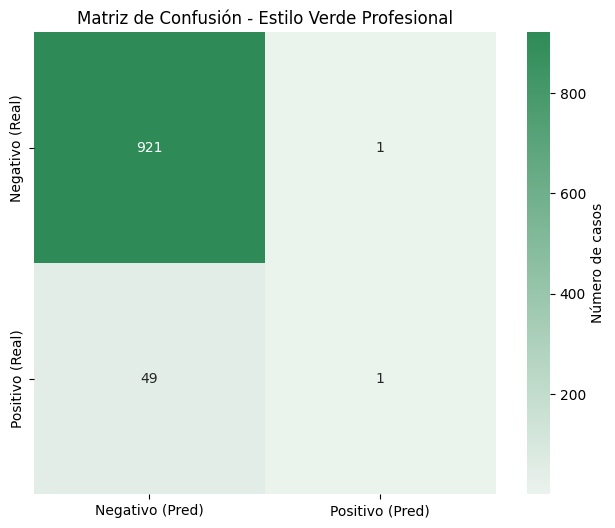

In [57]:
## Obtener los datos de la matriz de confusión desde Spark
conf_matrix_data = predictions.groupBy("ACV", "prediction").count() \
    .groupBy("ACV") \
    .pivot("prediction", [0, 1]) \
    .sum("count") \
    .na.fill(0) \
    .orderBy("ACV")

#Convertir a Pandas para visualización
conf_matrix_pd = conf_matrix_data.toPandas()
# Establecer el índice como los valores reales
conf_matrix_pd.set_index('ACV', inplace=True)
# Renombrar columnas para mejor legibilidad
conf_matrix_pd.columns = ['Negativo (Pred)', 'Positivo (Pred)']
conf_matrix_pd.index = ['Negativo (Real)', 'Positivo (Real)']

custom_green = sns.light_palette("seagreen", as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pd,
           annot=True,
           fmt='d',
           cmap=custom_green,
           cbar_kws={'label': 'Número de casos'},
           square=True)
plt.title('Matriz de Confusión - Estilo Verde Profesional')
plt.show()

In [64]:
# Configurar el evaluador base
evaluator = MulticlassClassificationEvaluator(labelCol="ACV", predictionCol="prediction")

# Calcular todas las métricas reutilizando el mismo evaluador
metricas = {
    "Accuracy": evaluator.setMetricName("accuracy").evaluate(predictions),
    "Precision": evaluator.setMetricName("weightedPrecision").evaluate(predictions),
    "Recall": evaluator.setMetricName("weightedRecall").evaluate(predictions),
    "F1 Score": evaluator.setMetricName("f1").evaluate(predictions)
}

# Mostrar resultados con formato mejorado
for nombre, valor in metricas.items():
    print(f"{nombre:>10}: {valor:.4f} ({valor*100:.2f}%)")

  Accuracy: 0.9486 (94.86%)
 Precision: 0.9264 (92.64%)
    Recall: 0.9486 (94.86%)
  F1 Score: 0.9255 (92.55%)


###Análisis de métricas:
- Altísima tasa de falsos negativos (FN = 49):
El modelo no identificó correctamente a 98% de los pacientes que sufrieron un derrame cerebral. Estos casos perdidos representan un riesgo crítico en entornos clínicos, ya que el tratamiento temprano puede marcar la diferencia entre la vida, la muerte o discapacidad severa.

- Modelo fuertemente sesgado hacia la clase negativa (pacientes sanos):
La gran cantidad de pacientes sanos ha provocado que el modelo aprenda a predecir principalmente “no ACV”.

- Aunque el modelo de árbol de decisión muestra una exactitud general del 94.86%, esta métrica es engañosa. Su desempeño real en la tarea crítica de detectar pacientes con riesgo de ACV es deficiente, con apenas un 2% de recall. El modelo no es clínicamente viable en su estado actual.

### Curva ROC-AUC

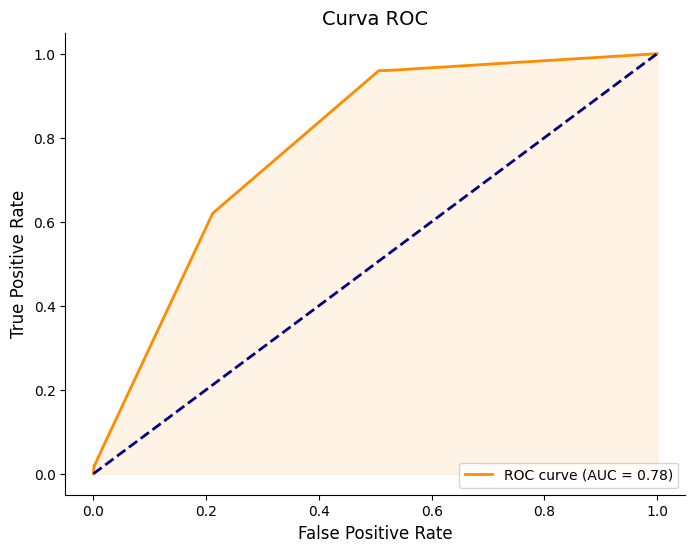

In [69]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades predichas y etiquetas reales
predicciones = predictions.select("ACV", "probability").toPandas()
predicciones['score'] = predicciones['probability'].apply(lambda x: x[1])

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(predicciones['ACV'], predicciones['score'])
roc_auc = auc(fpr, tpr)
#Graficar
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.fill_between(fpr, tpr, alpha=0.1, color='darkorange')
plt.title('Curva ROC', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
sns.despine()
plt.show()

### Análisis de Curva ROC-AUC
- Aunque el modelo tiene un AUC aceptable (0.78), su desempeño real en la predicción binaria (con umbral fijo) fue muy pobre: Solo 1 verdadero positivo (TP) frente a 49 falsos negativos (FN).
Esto sugiere que el umbral actual de clasificación es inadecuado, favoreciendo la clase mayoritaria (pacientes sanos).



# Conclusiones





- El conjunto de datos presenta un desbalance significativo en la variable objetivo ("ACV"). Hay una cantidad mucho mayor de registros de pacientes que no sufrieron un ACV (clase negativa) en comparación con aquellos que sí lo sufrieron (clase positiva). Este desbalance impactó directamente el rendimiento del modelo de clasificación, sesgándolo hacia la predicción de la clase mayoritaria.

- Aunque el modelo de Árbol de Decisión mostró una alta precisión general (accuracy), métricas como la precisión, el recall y el F1 Score, así como la matriz de confusión, revelaron un rendimiento muy bajo en la identificación de la clase positiva (pacientes que sufrieron ACV). La alta tasa de falsos negativos y el bajo recall (apenas 2%) indican que el modelo no es efectivo para la detección de casos de interés.

- A pesar de un AUC aceptable (0.78), el modelo actual con un umbral de clasificación fijo no es adecuado para un escenario clínico donde la detección de casos positivos es crucial. Es necesario explorar técnicas para manejar el desbalance de clases (como sobremuestreo, submuestreo o uso de métricas sensibles al desbalance) y posiblemente probar otros algoritmos de clasificación para mejorar la capacidad del modelo para identificar pacientes con riesgo de ACV.